### Q-9. A cyber security agent wants to check the Microsoft Malware so need he came to you as a Machine learning Engineering with Data, You need to find the Malware using a supervised algorithm and you need to find the accuracy of the model. Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [6]:
df.shape

(8921483, 83)

In [7]:
df = df.sample(6245038, random_state=42)

In [8]:
null_df = pd.DataFrame({"index": df.isna().sum().index, "values": df.isna().sum().values})

In [9]:
null_df.head(50)

,index,values
0,MachineIdentifier,0
1,ProductName,0
2,EngineVersion,0
3,AppVersion,0
4,AvSigVersion,0
5,IsBeta,0
6,RtpStateBitfield,22647
7,IsSxsPassiveMode,0
8,DefaultBrowsersIdentifier,5941832
9,AVProductStatesIdentifier,25294


In [10]:
null_df.tail(33)

,index,values
50,Census_InternalPrimaryDisplayResolutionVertical,32937
51,Census_PowerPlatformRoleName,32
52,Census_InternalBatteryType,4435812
53,Census_InternalBatteryNumberOfCharges,188047
54,Census_OSVersion,0
55,Census_OSArchitecture,0
56,Census_OSBranch,0
57,Census_OSBuildNumber,0
58,Census_OSBuildRevision,0
59,Census_OSEdition,0


In [11]:
cat_cols = list(df.select_dtypes(include="object").columns)

In [12]:
num_cols = list(df.select_dtypes(exclude="object").columns)[:-1]

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder

# Categorical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="median")),
    ]
)
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ("encoder", OrdinalEncoder()),
    ]
)

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

### Feature selection

In [14]:
X = df.drop(["HasDetections"], axis=1)
y = df["HasDetections"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [16]:
df_train = pd.concat([X_train, y_train], axis=1)

In [17]:
df_sampled = df_train.sample(100000, random_state=42)

In [18]:
X_fs = df_sampled.drop(["HasDetections"], axis=1)
y_fs = df_sampled["HasDetections"]

In [19]:
X_fs_processed = preprocessor.fit_transform(X_fs)

In [20]:
new_cols = num_cols + cat_cols

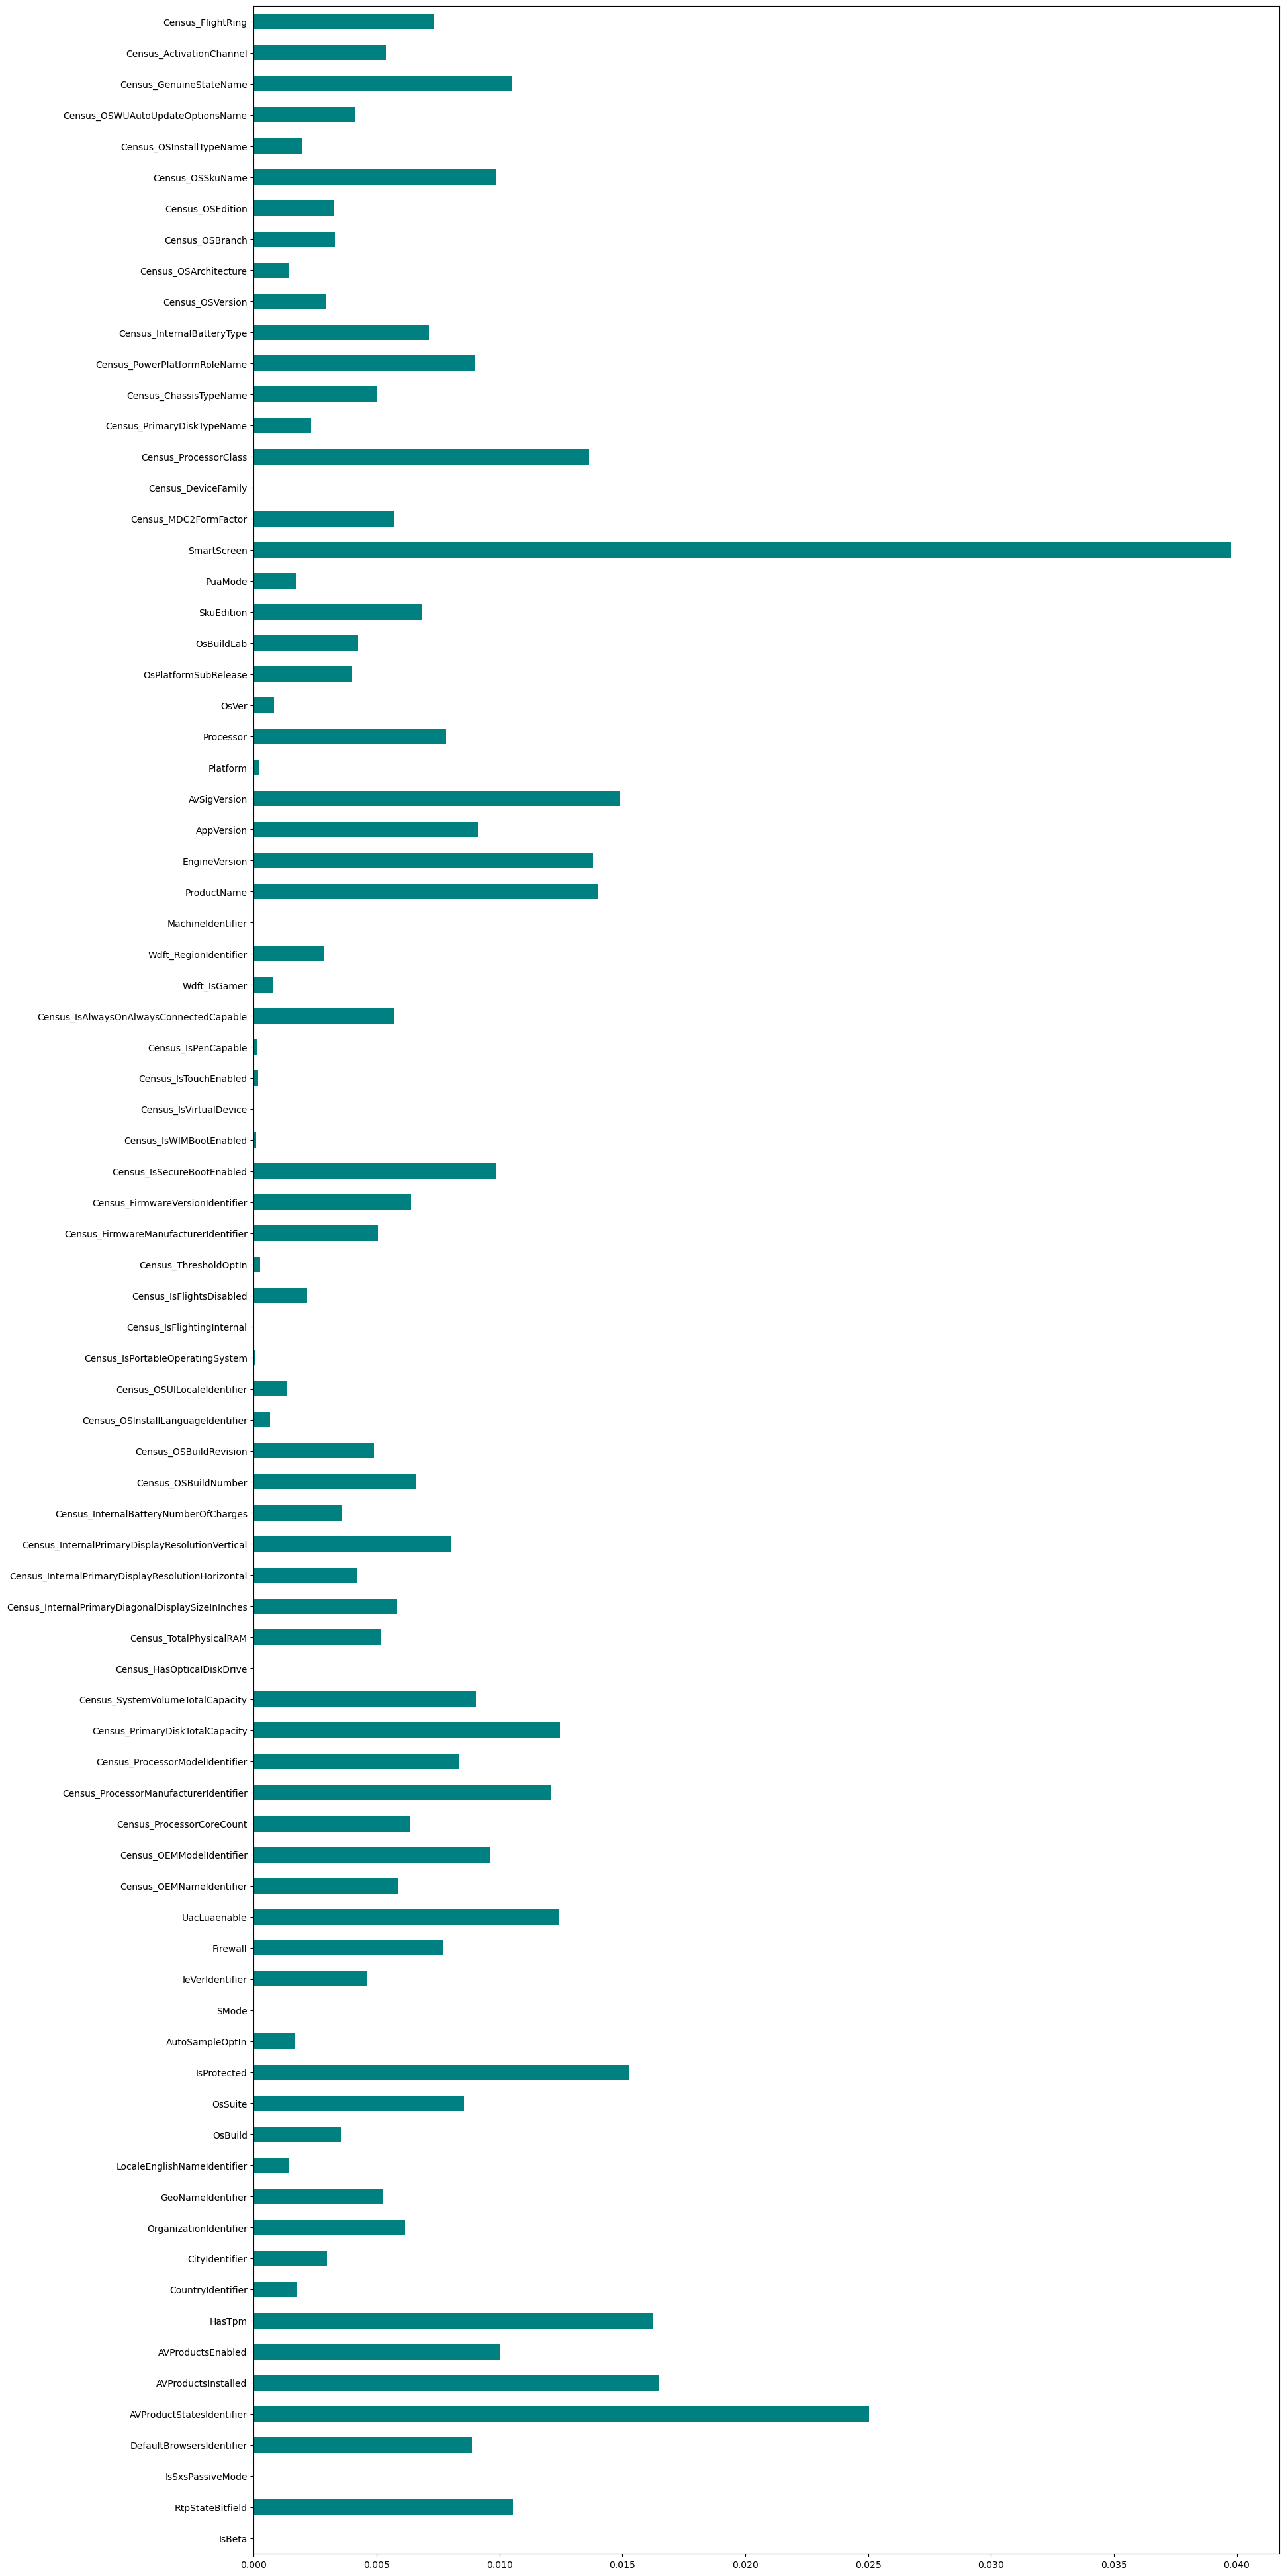

In [21]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# calculate mutual information between each feature and target variable
importances = mutual_info_classif(X_fs_processed, y_fs)

# create a pandas Series object to store feature importances
feat_importances = pd.Series(importances, new_cols)

# plot the feature importances
plt.figure(figsize=(20, 50))
feat_importances.plot(kind='barh', color='teal')
plt.show()

# create a pandas DataFrame object to store the feature importances and sort them by importance
fs = pd.DataFrame(feat_importances, columns=["Importance"])
fs = fs.sort_values(by="Importance")

In [22]:
fs.head(27)

,Importance
IsBeta,0.000000
Census_IsFlightingInternal,0.000000
SMode,0.000000
Census_IsVirtualDevice,0.000000
MachineIdentifier,0.000000
Census_HasOpticalDiskDrive,0.000000
Census_DeviceFamily,0.000000
IsSxsPassiveMode,0.000000
Census_IsPortableOperatingSystem,0.000050
Census_IsWIMBootEnabled,0.000099


In [23]:
cols_to_remove = list(fs.index[:26])

In [24]:
list(cols_to_remove)

['IsBeta',
 'Census_IsFlightingInternal',
 'SMode',
 'Census_IsVirtualDevice',
 'MachineIdentifier',
 'Census_HasOpticalDiskDrive',
 'Census_DeviceFamily',
 'IsSxsPassiveMode',
 'Census_IsPortableOperatingSystem',
 'Census_IsWIMBootEnabled',
 'Census_IsPenCapable',
 'Census_IsTouchEnabled',
 'Platform',
 'Census_ThresholdOptIn',
 'Census_OSInstallLanguageIdentifier',
 'Wdft_IsGamer',
 'OsVer',
 'Census_OSUILocaleIdentifier',
 'LocaleEnglishNameIdentifier',
 'Census_OSArchitecture',
 'AutoSampleOptIn',
 'PuaMode',
 'CountryIdentifier',
 'Census_OSInstallTypeName',
 'Census_IsFlightsDisabled',
 'Census_PrimaryDiskTypeName']

### Model Creation

In [25]:
df.drop(list(cols_to_remove), axis=1, inplace=True)

In [26]:
num_cols = list(df.select_dtypes(exclude="object").columns)[:-1]

In [27]:
num_cols = ['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSBuildNumber',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsSecureBootEnabled',
 'Wdft_IsGamer']

In [35]:
cat_cols = list(df.select_dtypes(include="object").columns)

In [37]:
cat_cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ProcessorClass',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [46]:
cat_cols = ['ProductName',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_ProcessorClass',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']


In [39]:
productname = ['fep', 'mse', 'mseprerelease', 'scep', 'win8defender', 'windowsintune']
processor = ['arm64', 'x64', 'x86']
osplatformsubrelease = ['prers5', 'rs1', 'rs2', 'rs3', 'rs4', 'th1', 'th2', 'windows7', 'windows8.1']
skuedition = ['Cloud', 'Education', 'Enterprise', 'Enterprise LTSB', 'Home', 'Invalid', 'Pro', 'Server']
smartscreen = ['&#x01;', '&#x02;', '&#x03;', '0', '00000000', 'Block', 'ExistsNotSet', 'OFF', 'Off', 'On', 'Prompt', 'Promt', 'RequireAdmin', 'Warn', 'off', 'on', 'prompt', 'requireadmin', 'warn']
census_mdc2formfactor = ['AllInOne', 'Convertible', 'Desktop', 'Detachable', 'IoTOther', 'LargeServer', 'LargeTablet', 'MediumServer', 'Notebook', 'PCOther', 'ServerOther', 'SmallServer', 'SmallTablet']
census_processorclass = ['high', 'low', 'mid']
census_chassistypename = ['0', '127', '25', '30', '31', '32', '35', '36', '44', '45', '49', '76', '81', '88', 'AllinOne', 'Blade', 'BladeEnclosure', 'BusExpansionChassis', 'CompactPCI', 'Convertible', 'Desktop', 'Detachable', 'DockingStation', 'EmbeddedPC', 'ExpansionChassis', 'HandHeld', 'IoTGateway', 'Laptop', 'LowProfileDesktop', 'LunchBox', 'MainServerChassis', 'MiniPC', 'MiniTower', 'MultisystemChassis', 'Notebook', 'Other', 'PizzaBox', 'Portable', 'RackMountChassis', 'SealedCasePC', 'SpaceSaving', 'StickPC', 'SubChassis', 'SubNotebook', 'Tablet', 'Tower', 'UNKNOWN', 'Unknown']
census_powerplatformrolename = ['AppliancePC', 'Desktop', 'EnterpriseServer', 'Mobile', 'PerformanceServer', 'SOHOServer', 'Slate', 'UNKNOWN', 'Unspecified', 'Workstation']
census_internalbatterytype = ['\x04ion', '\x04lio', '\x1f˙˙˙', '#', '#TAB#', '0ts0', '0x0b', '2337', '3ion', '4cel', '4ion', '4lio', '5nm1', 'a130', 'a132', 'a138', 'a140', 'asmb', 'bad', 'batt', 'bq20', 'ca48', 'cl53', 'h00j', 'h4°s', 'icp3', 'ithi', 'l\x06&#TAB#', 'l\x15', 'lai0', 'lgi0', 'lgl0', 'lgs0', 'lhp0', 'lhpo', 'li', 'li p', 'li-i', 'li-l', 'li-p', 'liio', 'lilo', 'lio', 'lion', 'lip', 'lipo', 'lipp', 'lit', 'li\x90o', 'liÿÿ', 'nimh', 'ots0', 'pa50', 'pad0', 'pbac', 'pbso', 'ram', 'real', 'sail', 'sams', 'unkn', 'vbox', 'virt', 'í\x03-i', '÷ÿóö', 'ÿÿÿÿ']
census_osbranch = ['Khmer OS', 'rs1_release', 'rs1_release_srvmedia', 'rs2_release', 'rs3_release', 'rs3_release_svc', 'rs3_release_svc_escrow', 'rs3_release_svc_escrow_im', 'rs4_release', 'rs5_release', 'rs5_release_sigma', 'rs5_release_sigma_dev', 'rs_onecore_stack_per1', 'rs_prerelease', 'rs_prerelease_flt', 'rs_shell', 'rs_xbox', 'th1', 'th1_st1', 'th2_release', 'th2_release_sec', 'win7sp1_ldr', 'win7sp1_ldr_escrow', 'win8_gdr', 'win8_ldr', 'winblue_ltsb', 'winblue_ltsb_escrow']
census_osedition = ['Cloud', 'CloudN', 'Core', 'CoreCountrySpecific', 'CoreN', 'CoreSingleLanguage', 'Education', 'EducationN', 'Enterprise', 'Enterprise 2015 LTSB', 'EnterpriseN', 'EnterpriseS', 'EnterpriseSN', 'Home', 'HomePremium', 'Professional', 'ProfessionalCountrySpecific', 'ProfessionalEducation', 'ProfessionalEducationN', 'ProfessionalN', 'ProfessionalSingleLanguage', 'ProfessionalWorkstation', 'ProfessionalWorkstationN', 'ServerDatacenter', 'ServerDatacenterEval', 'ServerRdsh', 'ServerSolution', 'ServerStandard', 'ServerStandardEval', 'Ultimate', 'professional']
census_osskuname = ['CLOUD', 'CLOUDN', 'CORE', 'CORE_COUNTRYSPECIFIC', 'CORE_N', 'CORE_SINGLELANGUAGE', 'DATACENTER_EVALUATION_SERVER', 'DATACENTER_SERVER', 'EDUCATION', 'EDUCATION_N', 'ENTERPRISE', 'ENTERPRISE_N', 'ENTERPRISE_S', 'ENTERPRISE_S_N', 'PROFESSIONAL', 'PROFESSIONAL_N', 'PRO_CHINA', 'PRO_FOR_EDUCATION', 'PRO_SINGLE_LANGUAGE', 'PRO_WORKSTATION', 'PRO_WORKSTATION_N', 'SB_SOLUTION_SERVER', 'SERVERRDSH', 'STANDARD_EVALUATION_SERVER', 'STANDARD_SERVER', 'STARTER', 'ULTIMATE', 'UNDEFINED', 'UNLICENSED']
census_oswuautoupdateoptionsname = ['AutoInstallAndRebootAtMaintenanceTime', 'DownloadNotify', 'FullAuto', 'Notify', 'Off', 'UNKNOWN']
census_genuinestatename = ['INVALID_LICENSE', 'IS_GENUINE', 'OFFLINE', 'TAMPERED', 'UNKNOWN']
census_activationchannel = ['OEM:DM', 'OEM:NONSLP', 'Retail', 'Retail:TB:Eval', 'Volume:GVLK', 'Volume:MAK']
census_flightring = ['Canary', 'Disabled', 'Invalid', 'NOT_SET', 'OSG', 'RP', 'Retail', 'Unknown', 'WIF', 'WIS']

In [40]:
# for i in cat_cols:
#     print(f"{i.lower()} = {sorted(list(df[i].value_counts().index))}")

In [47]:
# Categorical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="median")),
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ("encoder", OrdinalEncoder(categories=[productname, processor, osplatformsubrelease, skuedition, smartscreen, census_mdc2formfactor, census_processorclass, census_chassistypename, census_powerplatformrolename, census_internalbatterytype, census_osbranch, census_osedition, census_osskuname, census_oswuautoupdateoptionsname, census_genuinestatename, census_activationchannel, census_flightring])),
    ]
)

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

In [48]:
X_train_processed = preprocessor.fit_transform(X_train)

In [49]:
X_test_processed = preprocessor.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize all the classification models in a dictionary
models = {
#     'lr': LogisticRegression(random_state=42),
#     'dt': DecisionTreeClassifier(random_state=42),
#     'mlp': MLPClassifier(random_state=42),
#     'ridge': RidgeClassifier(random_state=42),
#     'rf': RandomForestClassifier(random_state=42, n_estimators=101),
#     'qda': QuadraticDiscriminantAnalysis(),
#     'ada': AdaBoostClassifier(random_state=42),
#     'gbc': GradientBoostingClassifier(random_state=42),
#     'lda': LinearDiscriminantAnalysis(),
#     'et': ExtraTreesClassifier(random_state=42),
#     'lightgbm': LGBMClassifier(random_state=42),
    'catboost': CatBoostClassifier(random_state=42, verbose=0)
}

trained_models_list = []

for model in list(models.values()):
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65    937625
           1       0.65      0.64      0.65    935887

    accuracy                           0.65   1873512
   macro avg       0.65      0.65      0.65   1873512
weighted avg       0.65      0.65      0.65   1873512



In [ ]:
# catboost
#               precision    recall  f1-score   support

#            0       0.65      0.66      0.65    670404
#            1       0.65      0.64      0.65    667819

#     accuracy                           0.65   1338223
#    macro avg       0.65      0.65      0.65   1338223
# weighted avg       0.65      0.65      0.65   1338223

In [ ]:
# lightbgm 65

In [ ]:
# adaboost
#         precision    recall  f1-score   support

#            0       0.63      0.61      0.62    670404
#            1       0.62      0.64      0.63    667819

#     accuracy                           0.62   1338223
#    macro avg       0.62      0.62      0.62   1338223
# weighted avg       0.62      0.62      0.62   1338223

In [ ]:
# random forest 63

In [ ]:
# lda 61

In [ ]:
# qda 56